In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_excel("2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx")
test=pd.read_excel("2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_평가데이터_210803.xlsx")

In [2]:
train.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,데이터집단 2,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,데이터집단 3,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,데이터 집단 4,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,데이터 집단 5,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,NaN,NaN,NaN,NaN,NaN,NaN,유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역)
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,8,2.54,122.569,6.3,7,7,7,8,2.54,122.542,6.3,7,7,7,8,2.54,122.55,6.4,7,7,8,8,2.54,122.675,6.4,7,7,8,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,8,2.53,122.562,6.4,7,8,7,8,2.53,122.55,6.4,7,8,7,8,2.53,122.558,7.3,7,8,10,10,2.53,122.668,7.3,7,8,10,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,8,2.53,122.556,7.3,7,9,7,8,2.53,122.558,7.3,7,9,8,8,2.53,122.567,8.2,7,9,10,11,2.53,122.661,8.2,7,9,10,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59
4,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3,7,10,7,8,2.53,122.556,8.2,7,10,8,8,2.53,122.567,8.2,7,10,10,10,2.53,122.575,11.3,9,10,15,14,2.53,122.654,11.3,9,10,15,14,2.53,122.62,11.3,9,10,15,14,2.53,122.585


In [3]:
train=train.drop(labels=0,axis=0)
column=['홍수사상번호','연','월','일','시간','유입량','1유역평균강수','1강우A','1강우B','1강우C','1강우D','1수위E','1수위D','2유역평균강수','2강우A','2강우B','2강우C','2강우D','2수위E','2수위D','3유역평균강수','3강우A','3강우B','3강우C','3강우D','3수위E','3수위D','4유역평균강수','4강우A','4강우B','4강우C','4강우D','4수위E','4수위D','5유역평균강수','5강우A','5강우B','5강우C','5강우D','5수위E','5수위D','6유역평균강수','6강우A','6강우B','6강우C','6강우D','6수위E','6수위D']
train.columns=column

In [4]:
train.head(3)

,홍수사상번호,연,월,일,시간,유입량,1유역평균강수,1강우A,1강우B,1강우C,1강우D,1수위E,1수위D,2유역평균강수,2강우A,2강우B,2강우C,2강우D,2수위E,2수위D,3유역평균강수,3강우A,3강우B,3강우C,3강우D,3수위E,3수위D,4유역평균강수,4강우A,4강우B,4강우C,4강우D,4수위E,4수위D,5유역평균강수,5강우A,5강우B,5강우C,5강우D,5수위E,5수위D,6유역평균강수,6강우A,6강우B,6강우C,6강우D,6수위E,6수위D
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,8,2.54,122.569,6.3,7,7,7,8,2.54,122.542,6.3,7,7,7,8,2.54,122.55,6.4,7,7,8,8,2.54,122.675,6.4,7,7,8,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,8,2.53,122.562,6.4,7,8,7,8,2.53,122.55,6.4,7,8,7,8,2.53,122.558,7.3,7,8,10,10,2.53,122.668,7.3,7,8,10,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,8,2.53,122.556,7.3,7,9,7,8,2.53,122.558,7.3,7,9,8,8,2.53,122.567,8.2,7,9,10,11,2.53,122.661,8.2,7,9,10,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [5]:
train.info()
print("test 해야할 행 수 : ",3051-2891," == test 행 수")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 1 to 3051
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   홍수사상번호   3051 non-null   float64
 1   연        3051 non-null   float64
 2   월        3051 non-null   float64
 3   일        3051 non-null   float64
 4   시간       3051 non-null   float64
 5   유입량      2891 non-null   float64
 6   1유역평균강수  3051 non-null   object 
 7   1강우A     3051 non-null   object 
 8   1강우B     3051 non-null   object 
 9   1강우C     3051 non-null   object 
 10  1강우D     3051 non-null   object 
 11  1수위E     3051 non-null   object 
 12  1수위D     3051 non-null   object 
 13  2유역평균강수  3051 non-null   object 
 14  2강우A     3051 non-null   object 
 15  2강우B     3051 non-null   object 
 16  2강우C     3051 non-null   object 
 17  2강우D     3051 non-null   object 
 18  2수위E     3051 non-null   object 
 19  2수위D     3051 non-null   object 
 20  3유역평균강수  3051 non-null   object 
 21  3강우A     3051 

In [6]:
test.head()

,NO,홍수사상번호,연,월,일,시간,유입량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,26.0,2018.0,7.0,1.0,6.0,NaN
2,2.0,26.0,2018.0,7.0,1.0,7.0,NaN
3,3.0,26.0,2018.0,7.0,1.0,8.0,NaN
4,4.0,26.0,2018.0,7.0,1.0,9.0,NaN


In [7]:
test=test.drop(labels=0 ,axis=0)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 1 to 160
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO      160 non-null    float64
 1   홍수사상번호  160 non-null    float64
 2   연       160 non-null    float64
 3   월       160 non-null    float64
 4   일       160 non-null    float64
 5   시간      160 non-null    float64
 6   유입량     0 non-null      float64
dtypes: float64(7)
memory usage: 10.0 KB


In [9]:
print('train shape : ', train.shape, 'test shape : ',test.shape)

train shape :  (3051, 48) test shape :  (160, 7)


In [10]:
new_train=train.iloc[:2891,:]
new_test=train.iloc[2891:,:]
X_train=new_train.drop(columns=['유입량'],axis=1)
Y_train=new_train['유입량']

강우량:순수하게 비만 내린 것을 측정한 값<br>
강수량:강우량+강설량(눈)


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_valid,y_valid))

0.9040095586325729


In [13]:
print(train['연'].unique())
years=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2017. 2018.]


In [14]:
graph_x=list()
graph_y=list()
for i in years:
    temp_mean=new_train[new_train['연']==i]['유입량'].mean()
    print(i,"년에서의 유입량 평균",temp_mean)
    graph_x.append(i)
    graph_y.append(temp_mean)

graph_x.sort()

2006 년에서의 유입량 평균 4017.2131236699393
2007 년에서의 유입량 평균 1787.9579105208695
2008 년에서의 유입량 평균 2626.792297278085
2009 년에서의 유입량 평균 1942.5283791525305
2010 년에서의 유입량 평균 1680.9884206668785
2011 년에서의 유입량 평균 1661.7498653282096
2012 년에서의 유입량 평균 983.6440902795267
2013 년에서의 유입량 평균 1149.853317194915
2017 년에서의 유입량 평균 861.8112948505585


In [15]:
type(temp_mean)

float

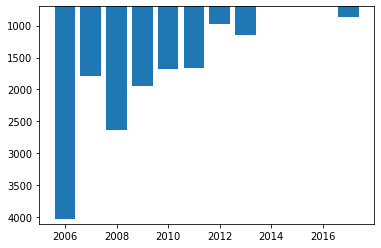

In [16]:
plt.bar(graph_x,graph_y)
plt.ylim(4100,700)
plt.show()

In [17]:
print(train['월'].unique())

[7. 8. 9. 6.]


In [18]:
graph_x=list()
graph_y=list()
for i in range(6,10):
    temp_mean=new_train[new_train['월']==i]['유입량'].mean()
    print(i,"월에서의 유입량 평균",temp_mean)
    graph_x.append(i)
    graph_y.append(temp_mean)

6 월에서의 유입량 평균 1873.9254853740003
7 월에서의 유입량 평균 1997.9886026154563
8 월에서의 유입량 평균 1086.374202842913
9 월에서의 유입량 평균 1640.2814136786649


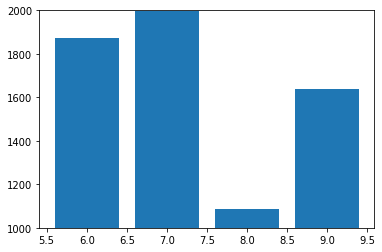

In [19]:
plt.bar(graph_x,graph_y)
plt.ylim(1000,2000)
plt.show()

In [20]:
graph_x=list()
graph_y=list()
for i in range(1,25):
    temp_mean=new_train[new_train['시간']==i]['유입량'].mean()
    print(i,"시에서의 유입량 평균",temp_mean)
    graph_x.append(i)
    graph_y.append(temp_mean)

1 시에서의 유입량 평균 1748.6875354237393
2 시에서의 유입량 평균 1734.2900072452467
3 시에서의 유입량 평균 1725.5770979150834
4 시에서의 유입량 평균 1694.8184494539832
5 시에서의 유입량 평균 1671.532986667648
6 시에서의 유입량 평균 1675.4696065625428
7 시에서의 유입량 평균 1667.5847824257978
8 시에서의 유입량 평균 1649.5747431785655
9 시에서의 유입량 평균 1677.6943076808268
10 시에서의 유입량 평균 1700.7545085028928
11 시에서의 유입량 평균 1742.8012693315588
12 시에서의 유입량 평균 1768.455535363815
13 시에서의 유입량 평균 1800.607846571624
14 시에서의 유입량 평균 1797.4851935564698
15 시에서의 유입량 평균 1794.2827865628094
16 시에서의 유입량 평균 1794.2592502620494
17 시에서의 유입량 평균 1773.6467794225412
18 시에서의 유입량 평균 1787.315259160001
19 시에서의 유입량 평균 1776.4221248755373
20 시에서의 유입량 평균 1790.4152124006612
21 시에서의 유입량 평균 1778.5656436708127
22 시에서의 유입량 평균 1784.805446800001
23 시에서의 유입량 평균 1795.4971320713112
24 시에서의 유입량 평균 1791.3324351447961


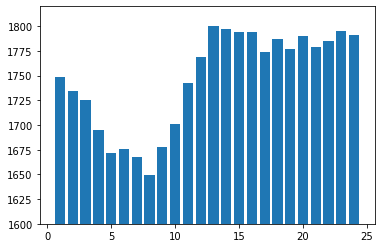

In [21]:
plt.bar(graph_x,graph_y)
plt.ylim(1600,1820)
plt.show()